### Skrypt do generowania danych

Pierwszy skrypt będzie generował plik CSV zawierający dane dotyczące sprzedaży produktów. Każdy rekord będzie zawierał datę sprzedaży, nazwę produktu i ilość sprzedanych sztuk.

```python
import csv
import random
from datetime import datetime, timedelta

# Nazwy przykładowych produktów
produkty = ["Produkt A", "Produkt B", "Produkt C", "Produkt D"]

# Generowanie danych
dane = []
data_poczatkowa = datetime.now() - timedelta(days=30)  # Dane z ostatnich 30 dni
for _ in range(100):  # Generowanie 100 rekordów
    data_sprzedazy = data_poczatkowa + timedelta(days=random.randint(0, 30))
    produkt = random.choice(produkty)
    ilosc = random.randint(1, 20)
    dane.append([data_sprzedazy.strftime("%Y-%m-%d"), produkt, ilosc])b

# Zapis do pliku CSV
nazwa_pliku = "sprzedaz_produktow.csv"
with open(nazwa_pliku, "w", newline='') as plik:
    pisarz = csv.writer(plik)
    pisarz.writerow(["Data", "Produkt", "Ilość"])  # Nagłówek
    pisarz.writerows(dane)

print(f"Zapisano dane do pliku '{nazwa_pliku}'.")
```

In [1]:
import csv
import random
from datetime import datetime, timedelta

# Nazwy przykładowych produktów
produkty = ["Produkt A", "Produkt B", "Produkt C", "Produkt D"]

# Generowanie danych
dane = []
data_poczatkowa = datetime.now() - timedelta(days=30)  # Dane z ostatnich 30 dni
for _ in range(100):  # Generowanie 100 rekordów
    data_sprzedazy = data_poczatkowa + timedelta(days=random.randint(0, 30))
    produkt = random.choice(produkty)
    ilosc = random.randint(1, 20)
    dane.append([data_sprzedazy.strftime("%Y-%m-%d"), produkt, ilosc])

# Zapis do pliku CSV
nazwa_pliku = "dane/sprzedaz_produktow.csv"
with open(nazwa_pliku, "w", newline='') as plik:
    pisarz = csv.writer(plik)
    pisarz.writerow(["Data", "Produkt", "Ilość"])  # Nagłówek
    pisarz.writerows(dane)

In [2]:
!cat dane/sprzedaz_produktow.csv


### Skrypt do przetwarzania danych

Drugi skrypt będzie czytać wygenerowany plik CSV, obliczać całkowitą ilość sprzedanych sztuk dla każdego produktu, a następnie wyświetlać podsumowanie.

```python
import csv
from collections import defaultdict

# Czytanie danych
nazwa_pliku = "sprzedaz_produktow.csv"
sprzedaz = defaultdict(int)  # Słownik do przechowywania sumy ilości dla każdego produktu

with open(nazwa_pliku, "r") as plik:
    czytelnik = csv.DictReader(plik)
    for rekord in czytelnik:
        produkt = rekord["Produkt"]
        ilosc = int(rekord["Ilość"])
        sprzedaz[produkt] += ilosc

# Wyświetlanie podsumowania
print("Podsumowanie sprzedaży produktów:")
for produkt, suma in sprzedaz.items():
    print(f"{produkt}: {suma} sztuk")
```

Pierwszy skrypt generuje dane dotyczące sprzedaży produktów w ciągu ostatnich 30 dni i zapisuje je do pliku CSV. Drugi skrypt czyta ten plik, oblicza sumę sprzedanych sztuk dla każdego produktu i wyświetla podsumowanie. Jest to prosty przykład, który można rozszerzyć o bardziej zaawansowane funkcje, takie jak analiza trendów sprzedaży, prognozowanie, czy integracja z bazami danych.

In [3]:
import csv
from collections import defaultdict

# Czytanie danych
nazwa_pliku = "dane/sprzedaz_produktow.csv"
sprzedaz = defaultdict(int)  # Słownik do przechowywania sumy ilości dla każdego produktu

with open(nazwa_pliku, "r") as plik:
    czytelnik = csv.DictReader(plik)
    for rekord in czytelnik:
        produkt = rekord["Produkt"]
        ilosc = int(rekord["Ilość"])
        sprzedaz[produkt] += ilosc

# Wyświetlanie podsumowania
print("Podsumowanie sprzedaży produktów:")
for produkt, suma in sprzedaz.items():
    print(f"{produkt}: {suma} sztuk")

Podsumowanie sprzedaży produktów:
Produkt A: 304 sztuk
Produkt C: 272 sztuk
Produkt B: 245 sztuk
Produkt D: 144 sztuk



Załóżmy, że nasz plik CSV (`sprzedaz_produktow.csv`) zawiera dane z ostatnich kilku miesięcy. Chcemy przeprowadzić analizę trendów sprzedaży dla produktu "Produkt A" i na tej podstawie prognozować sprzedaż na następny miesiąc.

### Skrypt do analizy i prognozowania

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Wczytanie danych
df = pd.read_csv('sprzedaz_produktow.csv')
df['Data'] = pd.to_datetime(df['Data'])

# Filtracja dla "Produkt A"
df_a = df[df['Produkt'] == "Produkt A"].sort_values('Data')

# Agregacja danych sprzedaży po dniach
df_a = df_a.groupby('Data').agg({'Ilość': 'sum'}).reset_index()

# Dodanie kolumny z numerem dnia jako cechy dla modelu
df_a['Dzien'] = (df_a['Data'] - df_a['Data'].min()).dt.days

# Podział danych na cechy (X) i etykietę (y)
X = df_a[['Dzien']]
y = df_a['Ilość']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Budowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Prognozowanie
y_pred = model.predict(X_test)

# Wykres rzeczywistej vs. prognozowanej sprzedaży
plt.scatter(X_test, y_test, color='black', label='Rzeczywiste dane')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prognoza')
plt.xlabel('Dni od początku okresu')
plt.ylabel('Ilość sprzedanych sztuk')
plt.title('Prognoza sprzedaży dla Produktu A')
plt.legend()
plt.show()

# Prognozowanie sprzedaży na następny dzień
nastepny_dzien = np.array([[X['Dzien'].max() + 1]])
prognoza_nastepny_dzien = model.predict(nastepny_dzien)
print(f"Prognozowana ilość sprzedaży dla 'Produkt A' na dzień {nastepny_dzien[0][0]}: {prognoza_nastepny_dzien[0]:.2f} sztuk")
```

W tym rozszerzeniu zastosowaliśmy prostą regresję liniową do prognozowania sprzedaży na podstawie danych historycznych. Najpierw wczytaliśmy dane, następnie przefiltrowaliśmy je dla konkretnego produktu i zagregowaliśmy po dniach. Po podzieleniu danych na zbiór treningowy i testowy, zbudowaliśmy model regresji liniowej i użyliśmy go do prognozowania sprzedaży.

Ważne jest, aby pamiętać, że w rzeczywistości modelowanie prognoz sprzedaży może być znacznie bardziej skomplikowane i wymagać zaawansowanych metod analizy szeregów czasowych, takich jak ARIMA, modele oparte na sieciach neuronowych, czy inne techniki machine learningu. Jednak powyższy przykład stanowi dobry punkt wyjścia do eksploracji tych metod.

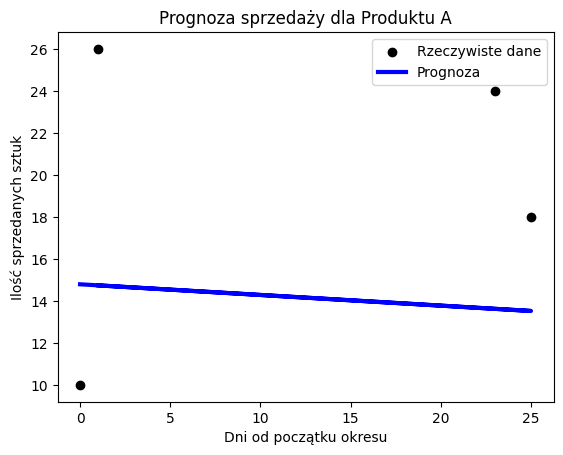

Prognozowana ilość sprzedaży dla 'Produkt A' na dzień 30: 13.27 sztuk


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


def prognoza(file_name="dane/sprzedaz_produktow.csv"):
    # Wczytanie danych
    df = pd.read_csv(file_name)
    df['Data'] = pd.to_datetime(df['Data'])

    # Filtracja dla "Produkt A"
    df_a = df[df['Produkt'] == "Produkt A"].sort_values('Data')

    # Agregacja danych sprzedaży po dniach
    df_a = df_a.groupby('Data').agg({'Ilość': 'sum'}).reset_index()

    # Dodanie kolumny z numerem dnia jako cechy dla modelu
    df_a['Dzien'] = (df_a['Data'] - df_a['Data'].min()).dt.days

    # Podział danych na cechy (X) i etykietę (y)
    X = df_a[['Dzien']]
    y = df_a['Ilość']

    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Budowanie modelu regresji liniowej
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prognozowanie
    y_pred = model.predict(X_test)

    # Wykres rzeczywistej vs. prognozowanej sprzedaży
    plt.scatter(X_test, y_test, color='black', label='Rzeczywiste dane')
    plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prognoza')
    plt.xlabel('Dni od początku okresu')
    plt.ylabel('Ilość sprzedanych sztuk')
    plt.title('Prognoza sprzedaży dla Produktu A')
    plt.legend()
    plt.show()

    # Prognozowanie sprzedaży na następny dzień
    nastepny_dzien = np.array([[X['Dzien'].max() + 1]])
    prognoza_nastepny_dzien = model.predict(nastepny_dzien)
    print(f"Prognozowana ilość sprzedaży dla 'Produkt A' na dzień {nastepny_dzien[0][0]}: {prognoza_nastepny_dzien[0]:.2f} sztuk")
    
    
prognoza()    

Aby umożliwić lepsze obserwowanie trendów w generowanych danych, możemy wprowadzić kilka zmian do skryptu generującego plik CSV. Jednym ze sposobów jest zastosowanie prostego modelu, który będzie stopniowo zwiększał lub zmniejszał sprzedaż poszczególnych produktów w czasie. Dzięki temu w danych będzie można zauważyć tendencje wzrostowe lub spadkowe.

Zmodyfikuję skrypt, aby dla każdego z produktów określić trend (np. wzrostowy, stabilny lub spadkowy) i odpowiednio dostosować ilość sprzedanych sztuk w zależności od daty sprzedaży.

```python
import csv
import random
from datetime import datetime, timedelta

# Nazwy przykładowych produktów i ich trendy (1 - wzrost, 0 - stabilny, -1 - spadek)
produkty_i_trendy = {
    "Produkt A": 1,
    "Produkt B": -1,
    "Produkt C": 0,
    "Produkt D": 1
}

# Generowanie danych
dane = []
data_poczatkowa = datetime.now() - timedelta(days=30)  # Dane z ostatnich 30 dni
for dzien in range(30):  # Dla każdego dnia w ciągu ostatnich 30 dni
    for produkt, trend in produkty_i_trendy.items():
        data_sprzedazy = data_poczatkowa + timedelta(days=dzien)
        bazowa_ilosc = random.randint(1, 10)
        # Modyfikacja ilości w zależności od trendu i dnia (prosty model liniowy)
        ilosc = bazowa_ilosc + trend * dzien // 3
        if ilosc < 1:
            ilosc = 1  # Zapewniamy, że ilość jest zawsze co najmniej 1
        dane.append([data_sprzedazy.strftime("%Y-%m-%d"), produkt, ilosc])

# Zapis do pliku CSV
nazwa_pliku = "sprzedaz_produktow_trendy.csv"
with open(nazwa_pliku, "w", newline='') as plik:
    pisarz = csv.writer(plik)
    pisarz.writerow(["Data", "Produkt", "Ilość"])  # Nagłówek
    pisarz.writerows(dane)

print(f"Zapisano dane do pliku '{nazwa_pliku}' z uwzględnieniem trendów.")
```

W tym skrypcie dla każdego produktu zdefiniowano trend sprzedaży. Ilość sprzedanych sztuk dla każdego dnia jest modyfikowana na podstawie tego trendu, co pozwala na generowanie danych, w których można zaobserwować wzrost, stabilność lub spadek sprzedaży w czasie. Prosty model liniowy (zwiększanie lub zmniejszanie ilości o wartość proporcjonalną do upływu dni) pozwala na symulację dynamiki sprzedaży.

Takie podejście umożliwia lepsze zrozumienie, jak zmienia się popyt na poszczególne produkty, i pozwala na bardziej zaawansowane analizy trendów w drugim skrypcie, który przetwarza dane.

In [5]:
import csv
import random
from datetime import datetime, timedelta

# Nazwy przykładowych produktów i ich trendy (1 - wzrost, 0 - stabilny, -1 - spadek)
produkty_i_trendy = {
    "Produkt A": 1,
    "Produkt B": -1,
    "Produkt C": 0,
    "Produkt D": 1
}

# Generowanie danych
dane = []
data_poczatkowa = datetime.now() - timedelta(days=30)  # Dane z ostatnich 30 dni
for dzien in range(30):  # Dla każdego dnia w ciągu ostatnich 30 dni
    for produkt, trend in produkty_i_trendy.items():
        data_sprzedazy = data_poczatkowa + timedelta(days=dzien)
        bazowa_ilosc = random.randint(1, 10)
        # Modyfikacja ilości w zależności od trendu i dnia (prosty model liniowy)
        ilosc = bazowa_ilosc + trend * dzien // 3
        if ilosc < 1:
            ilosc = 1  # Zapewniamy, że ilość jest zawsze co najmniej 1
        dane.append([data_sprzedazy.strftime("%Y-%m-%d"), produkt, ilosc])

# Zapis do pliku CSV
nazwa_pliku = "sprzedaz_produktow_trendy.csv"
with open(nazwa_pliku, "w", newline='') as plik:
    pisarz = csv.writer(plik)
    pisarz.writerow(["Data", "Produkt", "Ilość"])  # Nagłówek
    pisarz.writerows(dane)

print(f"Zapisano dane do pliku '{nazwa_pliku}' z uwzględnieniem trendów.")

Zapisano dane do pliku 'sprzedaz_produktow_trendy.csv' z uwzględnieniem trendów.


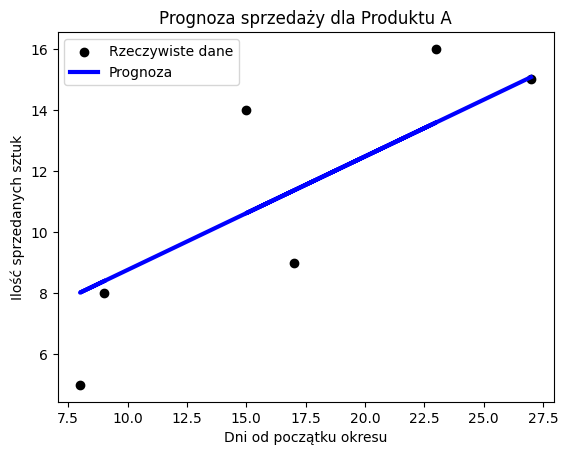

Prognozowana ilość sprzedaży dla 'Produkt A' na dzień 30: 16.19 sztuk


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
prognoza("sprzedaz_produktow_trendy.csv")